In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

#### Data Understanding

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=["RowNumber","CustomerId"],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


#### No of null value

In [6]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Surname

In [7]:
len(df["Surname"].unique())

2932

In [8]:
df["Surname"].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [9]:
pd.crosstab(df["Surname"],df["Exited"])

Exited,0,1
Surname,,
Abazu,2,0
Abbie,1,0
Abbott,3,1
Abdullah,0,1
Abdulov,2,0
...,...,...
Zubarev,3,0
Zubareva,1,0
Zuev,1,0


#### Credict Score

In [10]:
##  describe all
df["CreditScore"].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: xlabel='CreditScore'>

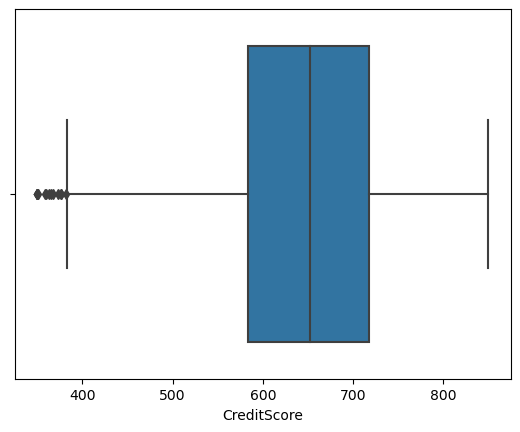

In [11]:
sns.boxplot(x="CreditScore",data=df)

-0.07160660820092675


<Axes: xlabel='CreditScore', ylabel='Count'>

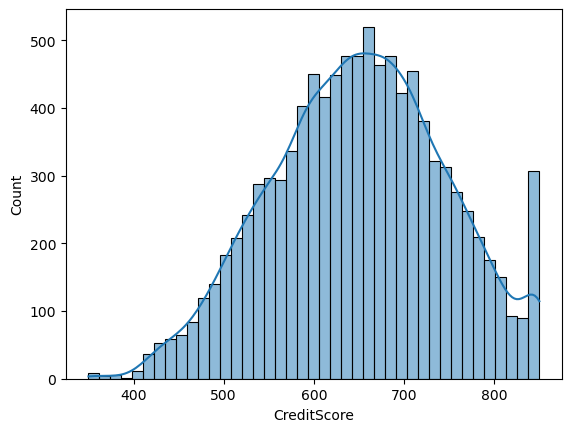

In [12]:
print(df["CreditScore"].skew())
sns.histplot(x="CreditScore",data=df,kde=True)

In [13]:
q1 = df["CreditScore"].quantile(.25)
q3 = df["CreditScore"].quantile(.75)
iqr = q3 - q1
lelf_max = q1-iqr*1.5
right_max = q3+iqr*1.5

In [14]:
## Here check how much percent are outlair
len(df[ (df["CreditScore"]<lelf_max) | (df["CreditScore"]>right_max) ] ) * 100/len(df)

0.15

In [15]:
## Treated outlair
from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method = "iqr", tail="both", fold=1.5)

df["CreditScore"] = win.fit_transform(df[["CreditScore"]])

### Geography

In [16]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
## Convert as a category type
df["Geography"] = df["Geography"].astype("category")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


<Axes: xlabel='Geography', ylabel='count'>

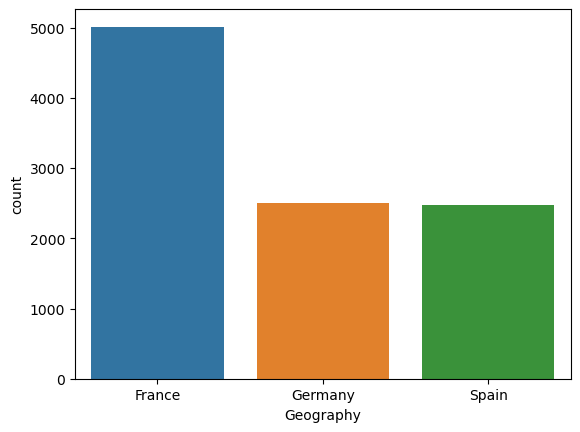

In [18]:
# Check how many each unique value
print(df["Geography"].value_counts())
sns.countplot(data = df, x = "Geography")

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


<Axes: xlabel='Geography', ylabel='count'>

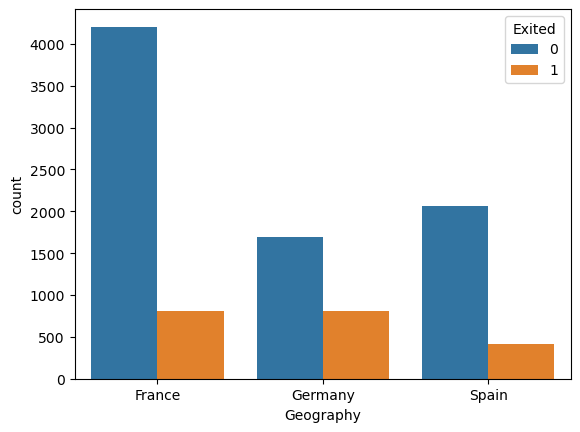

In [19]:
## Check How many each unique value to connect with Exited value
print(pd.crosstab(df["Geography"],df["Exited"]))

sns.countplot(data = df, x='Geography', hue='Exited')

### Gender

In [20]:
## Ckeck how many unique value are there
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
## Convert asa category type
df["Gender"] = df["Gender"].astype("category")

Gender
Male      5457
Female    4543
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

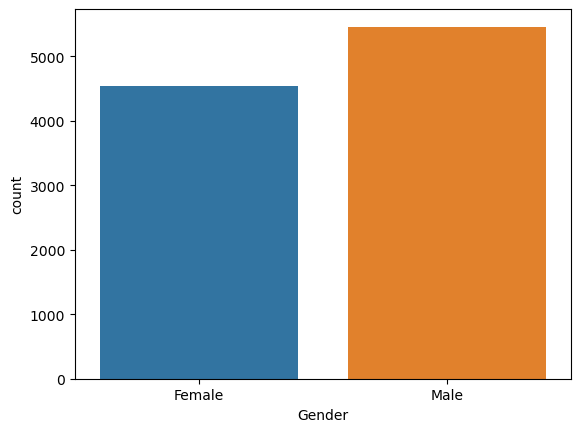

In [22]:
## Check strength of each unique value
print(df["Gender"].value_counts())

## Show as a visualization
sns.countplot(data = df, x = "Gender")

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


<Axes: xlabel='Gender', ylabel='count'>

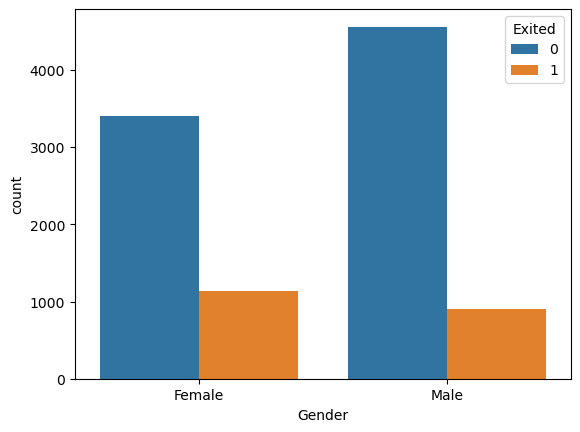

In [23]:
## Check How many each unique value to connect with Exited value
print(pd.crosstab(df["Gender"],df["Exited"]))

sns.countplot(data = df, x='Gender', hue='Exited')

### Age

In [24]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

1.0113202630234552


<Axes: xlabel='Age', ylabel='Count'>

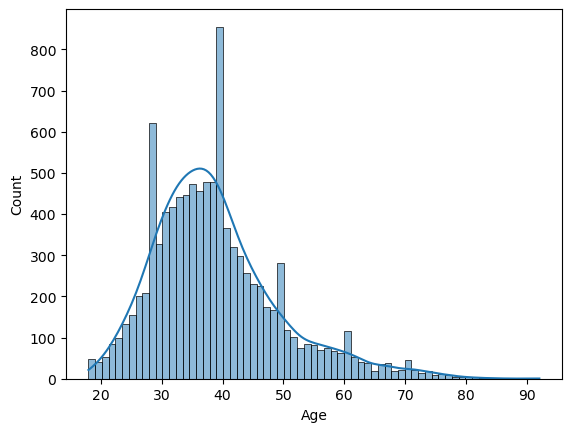

In [25]:
print(df["Age"].skew())
sns.histplot(x="Age",data=df,kde=True)

In [26]:
## It convert some category

interval = [17,30,50,62,100]
catagory = ["Teenage","young Adult","Adult","Senier"]

df["Age"] = pd.cut(df["Age"],bins=interval,labels=catagory)

In [27]:
df["Age"].value_counts()

Age
young Adult    6771
Teenage        1968
Adult           902
Senier          359
Name: count, dtype: int64

In [28]:
pd.crosstab(df["Age"],df["Exited"])

Exited,0,1
Age,,
Teenage,1820,148
young Adult,5445,1326
Adult,412,490
Senier,286,73


#### Tenure

In [29]:
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


<Axes: xlabel='Tenure', ylabel='count'>

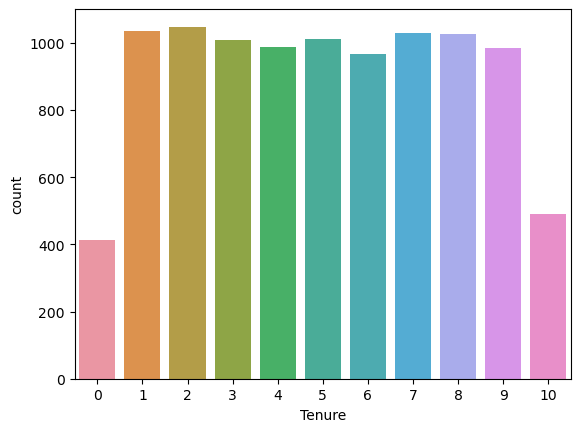

In [30]:
print(df["Tenure"].value_counts())
sns.countplot(data = df, x = "Tenure")

In [31]:
## Convert Tenure data in to Catagory type
df["Tenure"] = df["Tenure"].astype("category")

In [32]:
 ## Combine tenure for some group
df["Tenure"] = df["Tenure"].replace({
     0 : 1,
     2 : 3,
     4 : 5,
     6 : 7,
     8 : 10,
     9 : 10                          
})

Tenure
10    2499
3     2057
5     2001
7     1995
1     1448
Name: count, dtype: int64


<Axes: xlabel='Tenure', ylabel='count'>

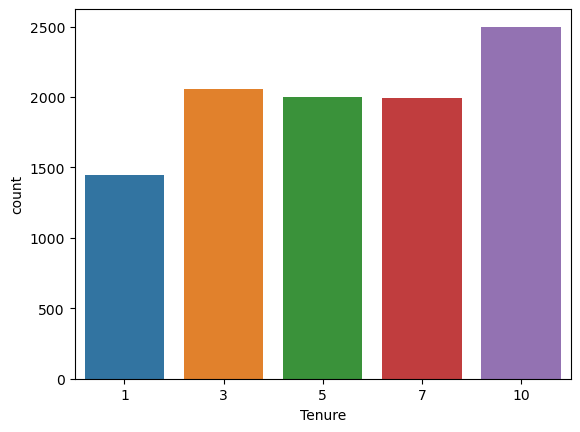

In [33]:
print(df["Tenure"].value_counts())
sns.countplot(data = df, x = "Tenure")

Exited     0    1
Tenure           
1       1121  327
3       1643  414
5       1589  412
7       1622  373
10      1988  511


<Axes: xlabel='Tenure', ylabel='count'>

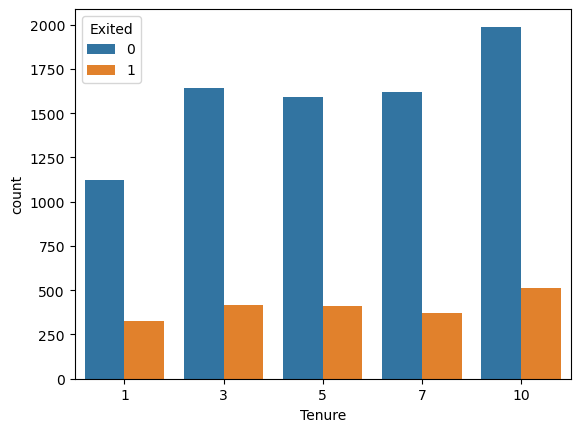

In [34]:
cross_tab = pd.crosstab(df["Tenure"],df["Exited"])
print(cross_tab)
sns.countplot(data = df, x='Tenure', hue='Exited')

#### Balance

-0.14110871094154384


<Axes: xlabel='Balance', ylabel='Count'>

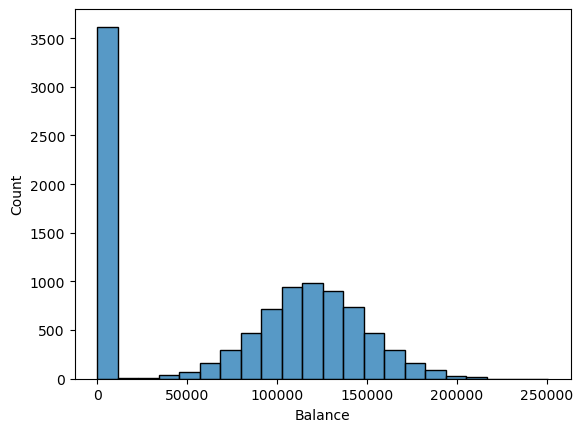

In [35]:
## Check Skewness have it normal distribution or not
print(df["Balance"].skew())

## Show Histogram
sns.histplot(x="Balance",data=df)

<Axes: xlabel='Balance'>

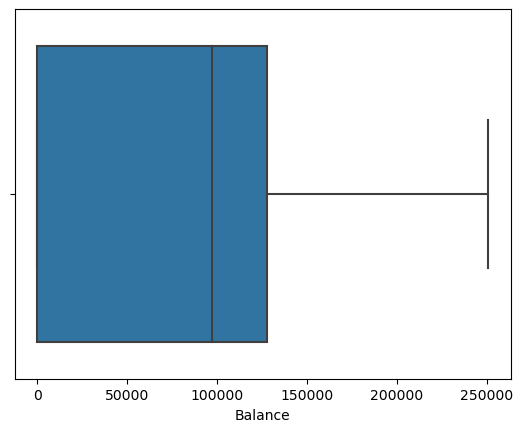

In [36]:
## Check boxplox have any outlair
sns.boxplot(x="Balance",data=df)

In [37]:
## Using Describe function to show how much data are variance to each other
df['Balance'].describe() 

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [38]:
## Here check how  much data are zero
x = df[df["Balance"]==0]
x["Exited"].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [39]:
## Here Minmun value is ZERO, and those are not accept churn that one we drop

df.drop(df[(df["Balance"]==0) & (df["Exited"]==0)].index,inplace=True)

In [40]:
## Again i check have chages of skewnwess
df["Balance"].skew()

-0.9959470484968557

<Axes: xlabel='Balance'>

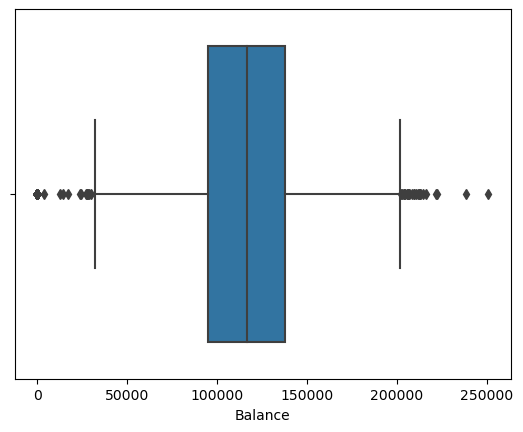

In [41]:
## Check Outlair

sns.boxplot(x="Balance",data=df)

In [42]:
## Check how many % of data are in outlair

q1 = df["Balance"].quantile(.25)
q3 = df["Balance"].quantile(.75)
iqr = q3 - q1
lelf_max = q1-iqr*1.5
right_max = q3+iqr*1.5

len(df[(df["Balance"]>right_max) | (df["Balance"]>right_max)])*100/len(df) ## Here only 0.42% have outlair 

0.42132790934185677

In [43]:
## Using Feature Engine that doing normal distribution

from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method = "iqr", tail="both", fold=1.5)

df["Balance"] = win.fit_transform(df[["Balance"]])


-0.4963267093708952


<Axes: xlabel='Balance'>

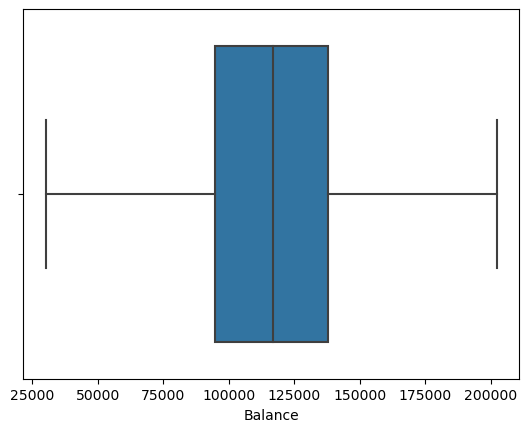

In [44]:
## Check Skewness
print(df["Balance"].skew())

## Check BOxplot
sns.boxplot(x="Balance",data=df)

#### NumOfProducts

In [45]:
# Count no of Unique value
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [46]:
## Here have convert category because it's have only 4 value
df["NumOfProducts"] = df["NumOfProducts"].astype("category")

In [47]:
## Check weight of the each unique value
df["NumOfProducts"].value_counts()

NumOfProducts
1    4517
2    2076
3     230
4      60
Name: count, dtype: int64

In [48]:
 ## Combine tenure for some group , like 4 combine to 3
df["NumOfProducts"] = df["NumOfProducts"].replace({
     3 : 4                        
})

Exited            0     1
NumOfProducts            
1              3108  1409
2              1728   348
4                10   280


<Axes: xlabel='NumOfProducts', ylabel='count'>

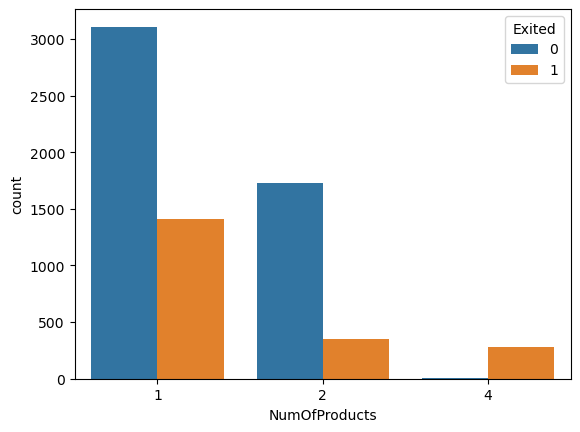

In [49]:
## Here i check with target value have any relation
print(pd.crosstab(df["NumOfProducts"],df["Exited"]))

## That show of in visualization
sns.countplot(data = df, x='NumOfProducts', hue='Exited')

#### HasCrCard

In [50]:
## Check Unique value
df["HasCrCard"].unique()

array([1, 0], dtype=int64)

In [51]:
## There have only 
df["HasCrCard"] = df["HasCrCard"].astype("category")

HasCrCard
1    4815
0    2068
Name: count, dtype: int64
1 =  69.95496149934621
0 =  30.045038500653785


<Axes: xlabel='HasCrCard', ylabel='count'>

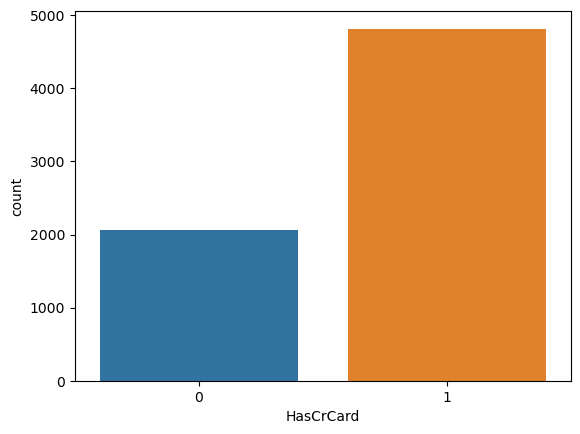

In [52]:
print(df["HasCrCard"].value_counts())

print("1 = ",df["HasCrCard"].value_counts()[1]*100/len(df))
print("0 = ",df["HasCrCard"].value_counts()[0]*100/len(df))

## Show visualize
sns.countplot(data=df, x ="HasCrCard")

Exited        0     1
HasCrCard            
0          1455   613
1          3391  1424


<Axes: xlabel='HasCrCard', ylabel='count'>

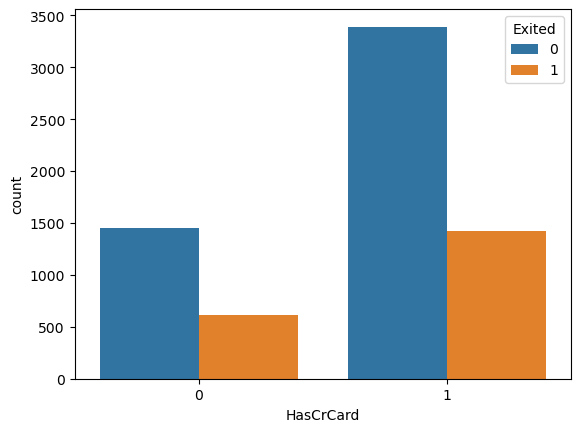

In [53]:
## Connect to output variable
print(pd.crosstab(df["HasCrCard"],df["Exited"]))

## Visualize 
sns.countplot(data = df, x = "HasCrCard", hue = "Exited")

#### IsActiveMember¶

In [54]:
## Check the weight of the unique value
df["IsActiveMember"].value_counts()

IsActiveMember
1    3458
0    3425
Name: count, dtype: int64

In [55]:
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

1 =  50.239721051866916
0 =  49.760278948133084


<Axes: xlabel='IsActiveMember', ylabel='count'>

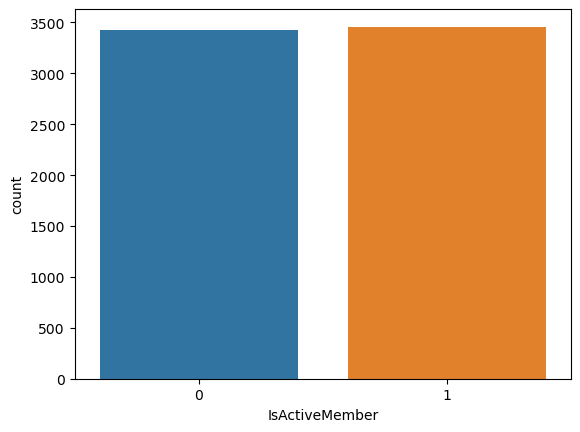

In [56]:
## Check the % f each unique value
print("1 = ",df["IsActiveMember"].value_counts()[1]*100/len(df))
print("0 = ",df["IsActiveMember"].value_counts()[0]*100/len(df))

## Show visualize
sns.countplot(data=df, x ="IsActiveMember")

<Axes: xlabel='IsActiveMember', ylabel='count'>

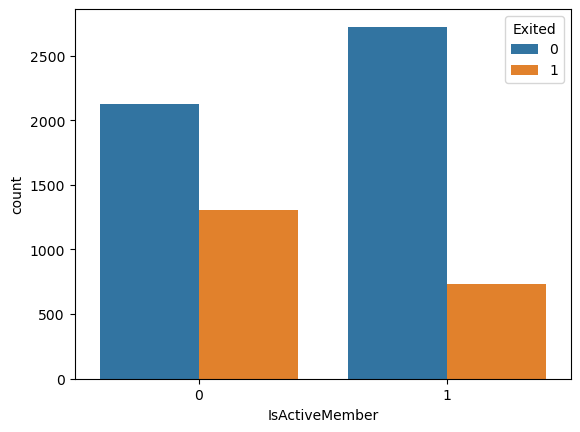

In [57]:
sns.countplot(data=df, x ="IsActiveMember", hue = "Exited")

#### EstimateSalary

-0.00038283740099951346


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

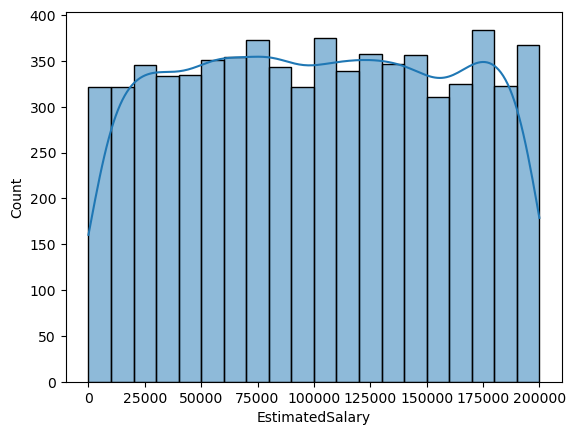

In [58]:
## Check skewness 
print(df["EstimatedSalary"].skew())

## Check, whether this is normal distribution or not
sns.histplot(x="EstimatedSalary",data=df,kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

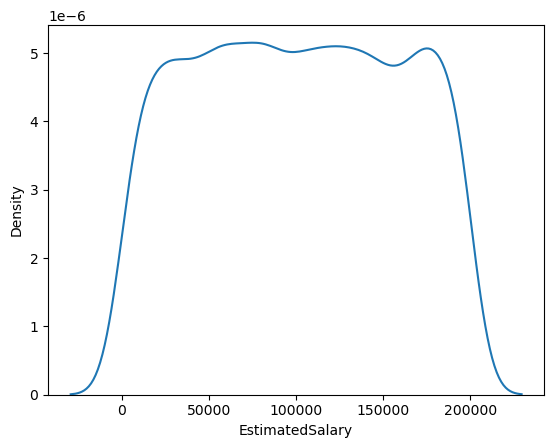

In [59]:
## Show kde plot
sns.kdeplot(data = df, x = "EstimatedSalary")

In [60]:
df["EstimatedSalary"].describe()

count      6883.000000
mean     100794.698320
std       57424.158136
min          11.580000
25%       51933.770000
50%      101108.850000
75%      149690.280000
max      199970.740000
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='EstimatedSalary'>

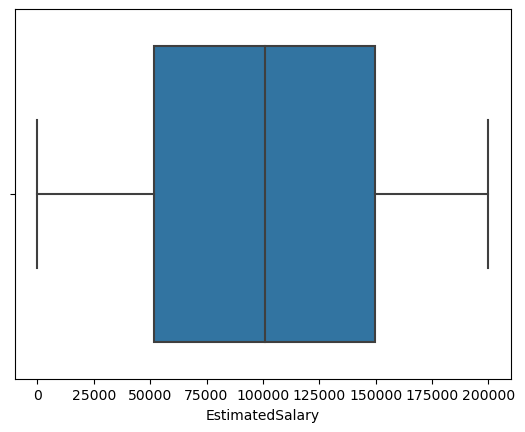

In [61]:
## Wheter check have outlair
sns.boxplot(data=df, x = "EstimatedSalary")

##### Exited¶

Exited
0    4846
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

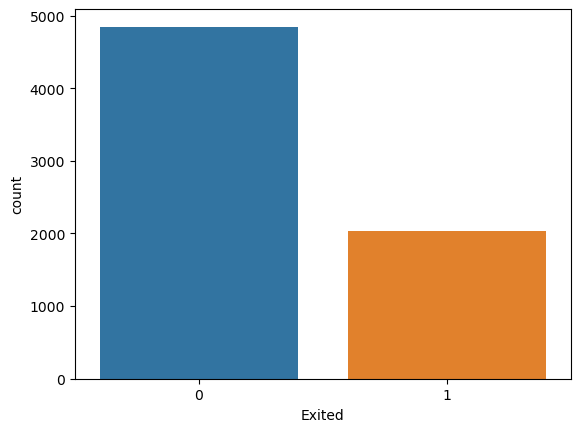

In [62]:
# Check Hw many value are there
print(df["Exited"].value_counts())

sns.countplot(data = df, x = "Exited")

In [63]:
### Here Surname is drop because surname not impact anything
df.drop(columns=["Surname"],inplace=True)

In [64]:
## Cnvert one hot encoding using dummies vriable 
df = pd.get_dummies(df)

<Axes: >

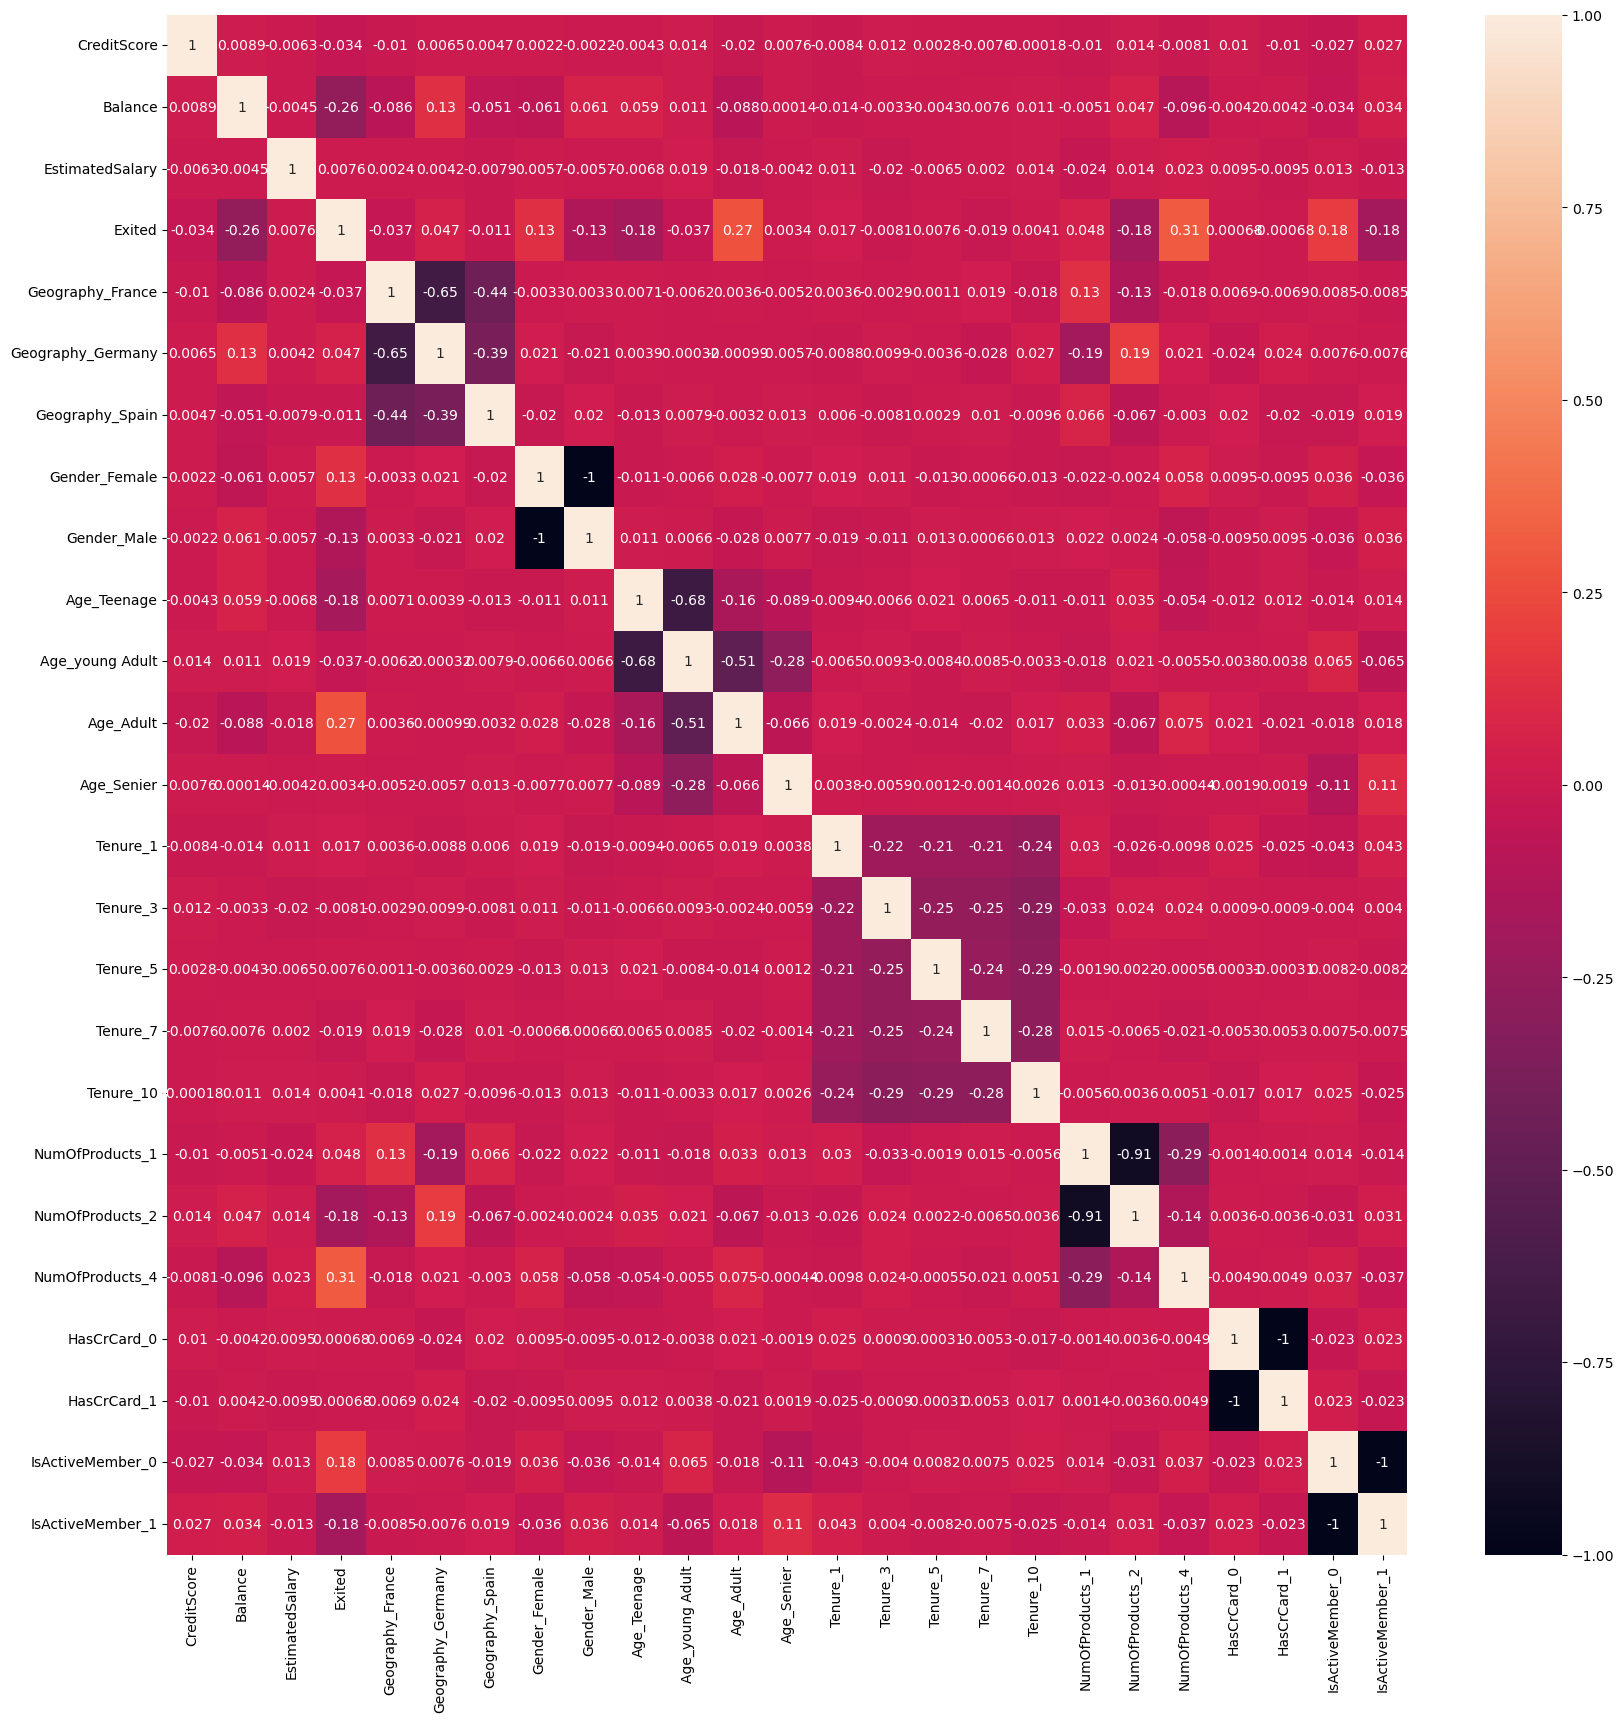

In [68]:
## Show the correlation between each column to every one using heat map 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)